## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [166]:
import pandas as pd
from pathlib import Path
%matplotlib inline


## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [167]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(Path ("Resources/bitstamp.csv"),
                      index_col = "Timestamp",
                      parse_dates = True,
                      infer_datetime_format = True)


### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [168]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
bitstamp.head()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,$430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,$430.89,0.143257,61.728095,430.890000
2015-12-31 19:03:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN
2015-12-31 19:04:00,430.19,431.06,430.19,$431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,$430.54,5.558156,2397.461993,431.341280


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [169]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase =  pd.read_csv(Path ("Resources/coinbase.csv"),
                      index_col = "Timestamp",
                      parse_dates = True,
                      infer_datetime_format = True)

In [170]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,$430.4,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,$430.4,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,$430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,$430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,$430.96,12.114161,5216.297064,430.595001


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [171]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
# YOUR CODE HERE
bitstamp = bitstamp.dropna()
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,$430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,$430.89,0.143257,61.728095,430.890000
2015-12-31 19:04:00,430.19,431.06,430.19,$431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,$430.54,5.558156,2397.461993,431.341280
2015-12-31 19:06:00,432.53,432.53,431.48,$432.52,4.117318,1776.650476,431.506725


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [172]:
# Use the str.replace function to remove the dollar sign, $
bitstamp["Close"] = bitstamp["Close"].str.replace("$", "")

### Step 3: Convert the data type of the Close column to a `float`.

In [173]:
# Convert the Close data type to a float
# YOUR CODE HERE
bitstamp["Close"]  = bitstamp["Close"].astype("float")

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [174]:
# Review the data forA duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

bitstamp = bitstamp.drop_duplicates().copy()

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [175]:
# Repeat Steps 1–4 for the coinbase DataFrame
# YOUR CODE HERE
coinbase.dropna()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,$430.4,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,$430.4,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,$430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,$430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,$430.96,12.114161,5216.297064,430.595001
...,...,...,...,...,...,...,...
2019-01-07 17:02:00,4006.01,4006.57,4006.00,$4006.01,3.382954,13553.433078,4006.390309
2019-01-07 17:03:00,4006.01,4006.57,4006.00,$4006.01,0.902164,3614.083169,4006.017233
2019-01-07 17:04:00,4006.01,4006.01,4006.00,$4006.01,1.192123,4775.647308,4006.003635


In [176]:
coinbase["Close"] = coinbase["Close"].str.replace("$", "")

In [177]:
coinbase["Close"]  = coinbase["Close"].astype("float")

In [178]:
coinbase.duplicated().sum()

38682

In [179]:
coinbase = coinbase.drop_duplicates().copy()
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,430.40,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,430.40,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,430.96,12.114161,5216.297064,430.595001


## Analyze the Data

Your analysis consists of the following steps:

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [180]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,["Close"]].copy()

# Review the first five rows of the DataFrame
# YOUR CODE HERE
bitstamp_sliced.head()

,Close
Timestamp,
2015-12-31 19:01:00,430.89
2015-12-31 19:02:00,430.89
2015-12-31 19:04:00,431.06
2015-12-31 19:05:00,430.54
2015-12-31 19:06:00,432.52


In [181]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[: , ["Close"]].copy()

# Review the first five rows of the DataFrame
# YOUR CODE HERE
coinbase_sliced.head()

,Close
Timestamp,
2015-12-31 19:01:00,430.40
2015-12-31 19:02:00,430.40
2015-12-31 19:03:00,430.36
2015-12-31 19:04:00,430.39
2015-12-31 19:05:00,430.96


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [182]:
# Generate the summary statistics for the bitstamp DataFrame
# YOUR CODE HERE
bitstamp_sliced.describe()

,Close
count,1.347772e+06
mean,4.503924e+03
std,3.956149e+03
min,1.500000e+00
25%,7.888900e+02
50%,3.788990e+03
75%,6.929443e+03
max,1.966575e+04


In [183]:
# Generate the summary statistics for the coinbase DataFrame
# YOUR CODE HERE
coinbase_sliced.describe()

,Close
count,1.549523e+06
mean,4.091926e+03
std,3.913501e+03
min,6.000000e-02
25%,6.754000e+02
50%,2.710730e+03
75%,6.593500e+03
max,1.989199e+04


<AxesSubplot:title={'center':'Coinbase Price'}, xlabel='Timestamp'>

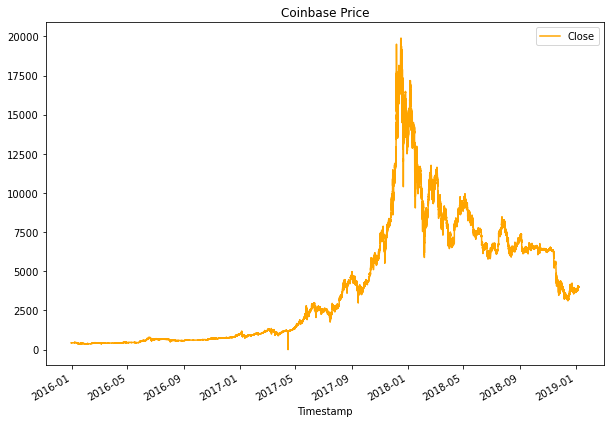

In [184]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
coinbase_sliced.plot(figsize = (10, 7), title = "Coinbase Price", color = "orange")

<AxesSubplot:title={'center':'Bitstamp Price'}, xlabel='Timestamp'>

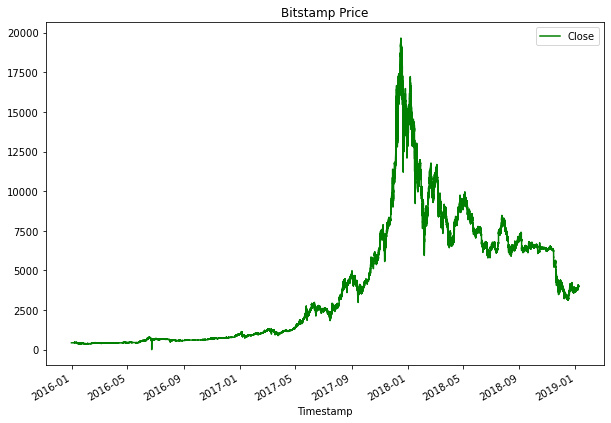

In [185]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
bitstamp_sliced.plot(figsize = (10, 7), title = "Bitstamp Price", color = "green")

<AxesSubplot:title={'center':'Coinbase and Bitstamp Price'}, xlabel='Timestamp'>

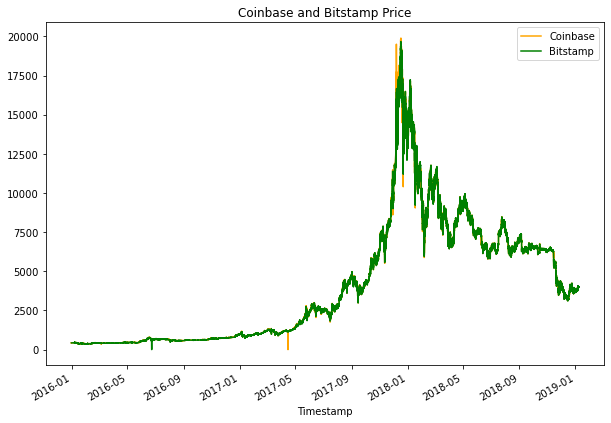

In [186]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE
coinbase_sliced["Close"].plot(legend = True, figsize = (10, 7), title = "Coinbase and Bitstamp Price", color = "orange", label = "Coinbase")
bitstamp_sliced["Close"].plot(legend = True,figsize = (10, 7), color = "green", label = "Bitstamp")



<AxesSubplot:title={'center':'Exchange Comparison: Coinbase and Bitstamp Price'}, xlabel='Timestamp'>

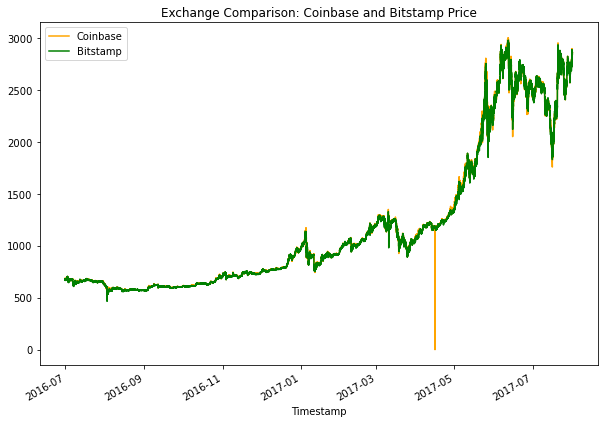

In [187]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE
coinbase_sliced.loc["2016-07-01":"2017-07-31", "Close"].plot(legend = True, figsize = (10, 7), title = "Exchange Comparison: Coinbase and Bitstamp Price", color = "orange", label = "Coinbase")
bitstamp_sliced.loc["2016-07-01":"2017-07-31", "Close"].plot(legend = True,figsize = (10, 7), color = "green", label = "Bitstamp")

<AxesSubplot:title={'center':'Exchange Comparison: Coinbase and Bitstamp Price'}, xlabel='Timestamp'>

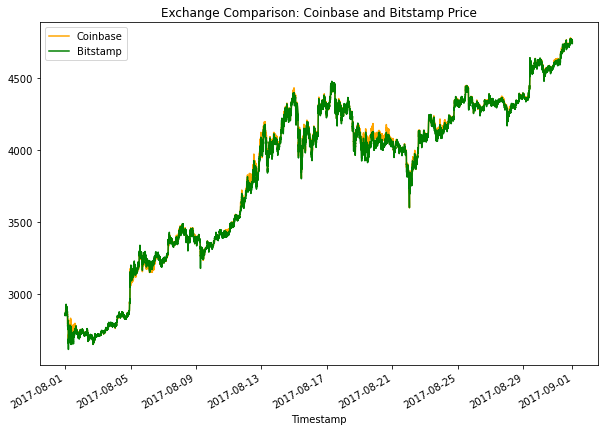

In [188]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
# YOUR CODE HERE
coinbase_sliced.loc["2017-08-01":"2017-08-31", "Close"].plot(legend = True, figsize = (10, 7), title = "Exchange Comparison: Coinbase and Bitstamp Price", color = "orange", label = "Coinbase")
bitstamp_sliced.loc["2017-08-01":"2017-08-31", "Close"].plot(legend = True,figsize = (10, 7), color = "green", label = "Bitstamp")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** #In the first period we had a incrise of the price in the end of the period, but with a lot of variation, in the second period the price incresed a lot without the down variation

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the last year of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Exchange Comparison: Coinbase and Bitstamp Price 10/10/2016'}, xlabel='Timestamp'>

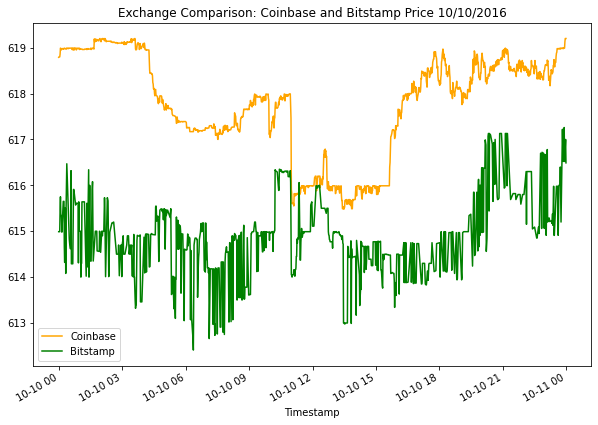

In [189]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
coinbase_sliced["Close"].loc["2016-10-10"].plot(legend = True, figsize = (10, 7), title = "Exchange Comparison: Coinbase and Bitstamp Price 10/10/2016", color = "orange", label = "Coinbase")
bitstamp_sliced["Close"].loc["2016-10-10"].plot(legend = True,figsize = (10, 7), color = "green", label = "Bitstamp")

In [190]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_sliced["Close"].loc["2016-10-10"] - bitstamp_sliced["Close"].loc["2016-10-10"]

# Generate summary statistics for the early DataFrame
# YOUR CODE HERE
arbitrage_spread_early.describe()

count    814.000000
mean       2.644902
std        1.233488
min       -0.230000
25%        1.560000
50%        2.670000
75%        3.595000
max        5.670000
Name: Close, dtype: float64

<AxesSubplot:>

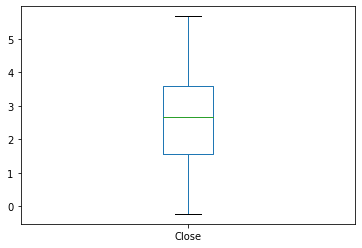

In [191]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# Be sure to include at least a title with your plot
# YOUR CODE HERE
arbitrage_spread_early.plot(kind = "box")

<AxesSubplot:title={'center':'09/15/2017'}, xlabel='Timestamp'>

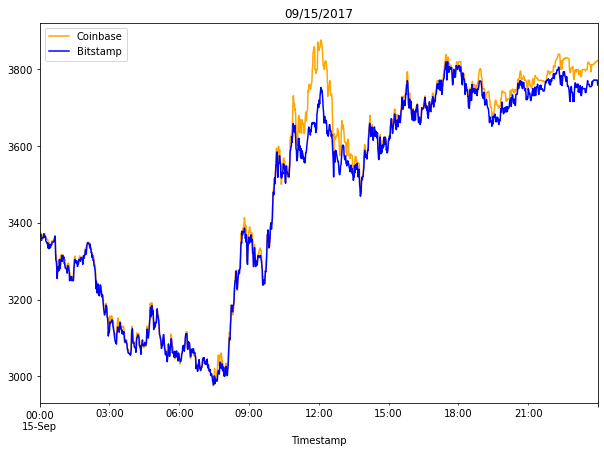

In [192]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
coinbase_sliced["Close"].loc["2017-09-15"].plot(legend = True, figsize = (10, 7), title = "09/15/2017", color = "orange", label = "Coinbase")
bitstamp_sliced["Close"].loc["2017-09-15"].plot(legend = True,figsize = (10, 7), color = "blue", label = "Bitstamp")

In [193]:
# Using the date form the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced["Close"].loc["2017-09-15"] -bitstamp_sliced["Close"].loc["2017-09-15"]

# Generate summary statistics for the middle DataFrame
# YOUR CODE HERE
arbitrage_spread_middle.describe()

count    1439.000000
mean       21.959340
std        31.105196
min       -47.930000
25%         3.215000
50%        12.270000
75%        29.835000
max       198.160000
Name: Close, dtype: float64

<AxesSubplot:>

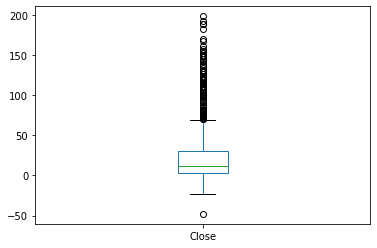

In [194]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
# Be sure to include at least a title with your plot
# YOUR CODE HERE
arbitrage_spread_middle.plot(kind = "box")

<AxesSubplot:title={'center':'Exchange Comparison: Coinbase and Bitstamp Price 10/10/2018'}, xlabel='Timestamp'>

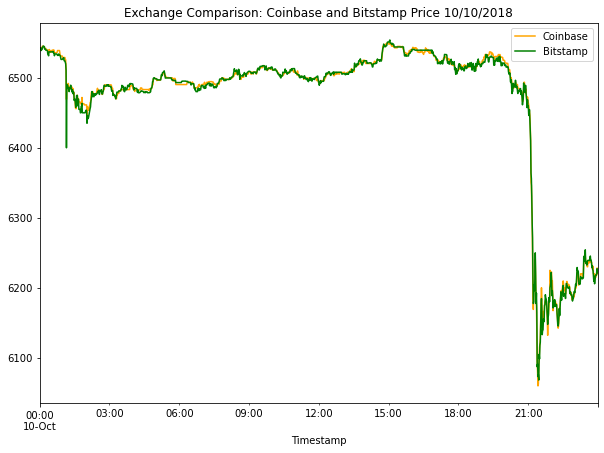

In [195]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
coinbase_sliced["Close"].loc["2018-10-10"].plot(legend = True, figsize = (10, 7), title = "Exchange Comparison: Coinbase and Bitstamp Price 10/10/2018", color = "orange", label = "Coinbase")
bitstamp_sliced["Close"].loc["2018-10-10"].plot(legend = True,figsize = (10, 7), color = "green", label = "Bitstamp")

In [196]:
# Using th date from late in the dataset that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_sliced["Close"].loc["2018-10-10"] - bitstamp_sliced["Close"].loc["2018-10-10"]

# Generate summary statistics for the late DataFrame
# YOUR CODE HERE
arbitrage_spread_late.describe()

count    1346.000000
mean        0.901322
std         4.755874
min       -27.300000
25%        -1.405000
50%         0.490000
75%         3.120000
max        69.230000
Name: Close, dtype: float64

<AxesSubplot:>

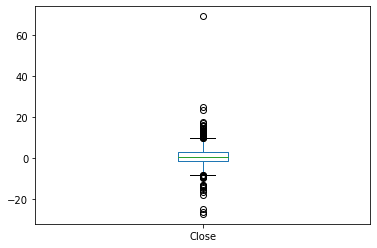

In [197]:
# Visualize the arbitrage spread from late in the dataset in a box plot
# Be sure to include at least a title with your plot
# YOUR CODE HERE
arbitrage_spread_late.plot(kind = "box")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

In [198]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase_sliced["Close"].loc["2016-10-10"] - bitstamp_sliced["Close"].loc["2016-10-10"]

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE
spread_early = arbitrage_spread_early[arbitrage_spread_early > 0]
spread_early.describe()

count    810.000000
mean       2.658593
std        1.220986
min        0.080000
25%        1.570000
50%        2.680000
75%        3.600000
max        5.670000
Name: Close, dtype: float64

In [199]:
# For the from the middle of the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = coinbase_sliced["Close"].loc["2017-09-15"] - bitstamp_sliced["Close"].loc["2017-09-15"]

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE
spread_middle = arbitrage_spread_middle[arbitrage_spread_middle > 1]
spread_middle.describe()

count    1188.000000
mean       27.400758
std        31.572487
min         1.010000
25%         7.987500
50%        16.000000
75%        34.952500
max       198.160000
Name: Close, dtype: float64

In [200]:
# For the date late in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = coinbase_sliced["Close"].loc["2018-10-10"] - bitstamp_sliced["Close"].loc["2018-10-10"]

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE
spread_late = arbitrage_spread_late[arbitrage_spread_late> 1]
spread_late.describe()

count    584.000000
mean       4.536079
std        4.198175
min        1.010000
25%        2.130000
50%        3.500000
75%        5.537500
max       69.230000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [201]:
# For the date early in the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0) by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_early = spread_early / coinbase_sliced["Close"].loc["2016-10-10"]

# Review the spread return DataFrame
# YOUR CODE HERE
spread_return_early.describe()

count    810.000000
mean       0.004303
std        0.001971
min        0.000130
25%        0.002549
50%        0.004351
75%        0.005830
max        0.009158
Name: Close, dtype: float64

In [202]:
# For the date in the middle of the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0)  by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_middle = spread_middle / coinbase_sliced["Close"].loc["2017-09-15"]

# Review the spread return DataFrame
# YOUR CODE HERE
spread_return_middle.describe()

count    1188.000000
mean        0.007484
std         0.008287
min         0.000300
25%         0.002348
50%         0.004623
75%         0.009480
max         0.051345
Name: Close, dtype: float64

In [203]:
# For the date late in the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0)  by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_late = spread_late / coinbase_sliced["Close"].loc["2018-10-10"]

# Review the spread return DataFrame
spread_return_late.describe()

count    584.000000
mean       0.000706
std        0.000659
min        0.000154
25%        0.000330
50%        0.000542
75%        0.000858
max        0.010701
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [204]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
# YOUR CODE HERE
profitable_trades_early.head()

Series([], Name: Close, dtype: float64)

In [205]:
# For the date in the middle of the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

# Review the first five profitable trades
# YOUR CODE HERE
profitable_trades_middle.head()

Timestamp
2017-09-15 02:57:00    0.014617
2017-09-15 07:40:00    0.014730
2017-09-15 07:41:00    0.013093
2017-09-15 07:42:00    0.015760
2017-09-15 07:48:00    0.012341
Name: Close, dtype: float64

In [206]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
# YOUR CODE HERE
profitable_trades_late.head()

Timestamp
2018-10-10 01:09:00    0.010701
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [207]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE
profitable_trades_early.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [208]:
# For the date in the middle of the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE
profitable_trades_middle.describe()

count    277.000000
mean       0.019231
std        0.009631
min        0.010033
25%        0.012273
50%        0.014970
75%        0.023875
max        0.051345
Name: Close, dtype: float64

In [209]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE
profitable_trades_late.describe()

count    1.000000
mean     0.010701
std           NaN
min      0.010701
25%      0.010701
50%      0.010701
75%      0.010701
max      0.010701
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [210]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp_sliced['Close'].loc['2016-08-01']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
# YOUR CODE HERE
profit_per_trade_early

Series([], Name: Close, dtype: float64)

In [211]:
# For the date in the middle of the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * bitstamp_sliced['Close'].loc['2017-09-15']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the early profit DataFrame
# YOUR CODE HERE
profit_per_trade_middle

Timestamp
2017-09-15 02:57:00    45.386727
2017-09-15 07:40:00    44.337150
2017-09-15 07:41:00    39.476268
2017-09-15 07:42:00    47.391145
2017-09-15 07:48:00    37.303879
                         ...    
2017-09-15 23:55:00    47.406607
2017-09-15 23:56:00    46.899607
2017-09-15 23:57:00    48.147563
2017-09-15 23:58:00    50.757663
2017-09-15 23:59:00    62.474271
Name: Close, Length: 277, dtype: float64

In [223]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * bitstamp_sliced['Close'].loc['2018-10-10']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profitable_trades_late.dropna()

# View the early profit DataFrame
# YOUR CODE HERE
profit_per_trade_late

Timestamp
2018-10-10 01:09:00    0.010701
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [213]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE

profit_per_trade_early.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade 10/10/2016'}, xlabel='Timestamp'>

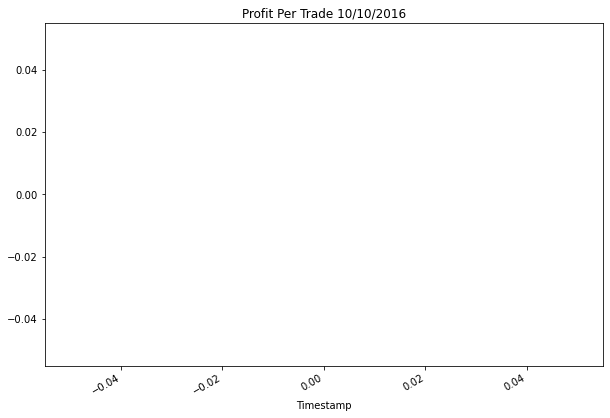

In [214]:
# Plot the results for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
# YOUR CODE HERE
profit_per_trade_early.plot(figsize = (10,7), title = "Profit Per Trade 10/10/2016")

In [220]:
# Generate the summary statistics for the middle profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_middle.describe()

count    277.000000
mean      70.262244
std       35.345446
min       33.933284
25%       44.586896
50%       55.270934
75%       88.653587
max      187.985389
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade 09/15/2017'}, xlabel='Timestamp'>

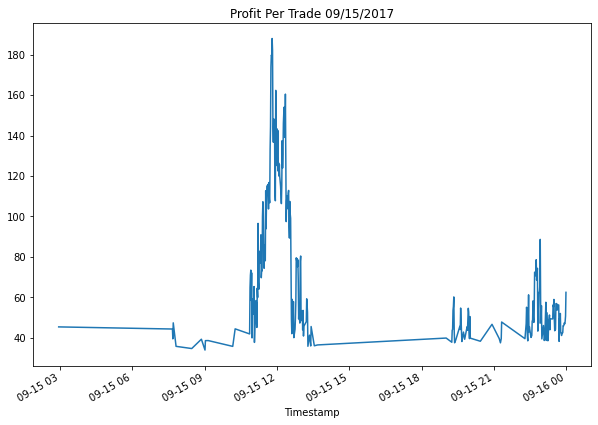

In [221]:
# Plot the results for the middle profit per trade DataFrame
# Be sure to include at least a title with your plot
# YOUR CODE HERE
profit_per_trade_middle.plot(figsize = (10,7), title = "Profit Per Trade 09/15/2017")

In [222]:
# Generate the summary statistics for the late profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_late.describe()

count    1.000000
mean     0.010701
std           NaN
min      0.010701
25%      0.010701
50%      0.010701
75%      0.010701
max      0.010701
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade 10/10/2018'}, xlabel='Timestamp'>

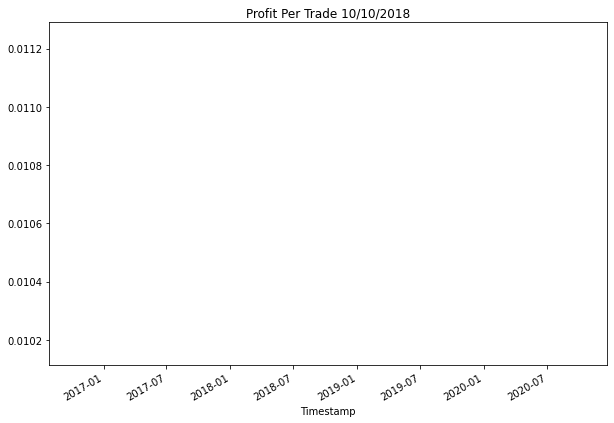

In [224]:
# Plot the results for the late profit per trade DataFrame
# Be sure to include at least a title with your plot
# YOUR CODE HERE
profit_per_trade_late.plot(figsize = (10,7), title = "Profit Per Trade 10/10/2018")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [225]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE
profit_sum_early = profit_per_trade_early.sum()
profit_sum_early

0.0

In [226]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
# YOUR CODE HERE

profit_sum_middle = profit_per_trade_middle.sum()
profit_sum_middle

19462.641451414904

In [227]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
# YOUR CODE HERE
profit_sum_late = profit_per_trade_late.sum()
profit_sum_late

0.010701428145235148

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [228]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Cumulative Profits 10/10/2016'}, xlabel='Timestamp'>

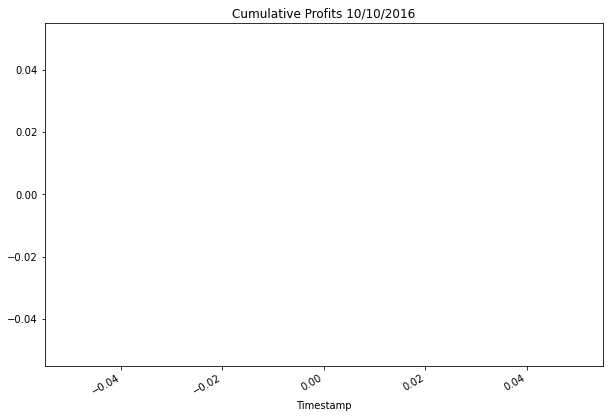

In [229]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
cumulative_profit_early.plot(figsize=(10, 7), title="Cumulative Profits 10/10/2016")

In [230]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()


<AxesSubplot:title={'center':'Cumulative Profits 09/15/2017'}, xlabel='Timestamp'>

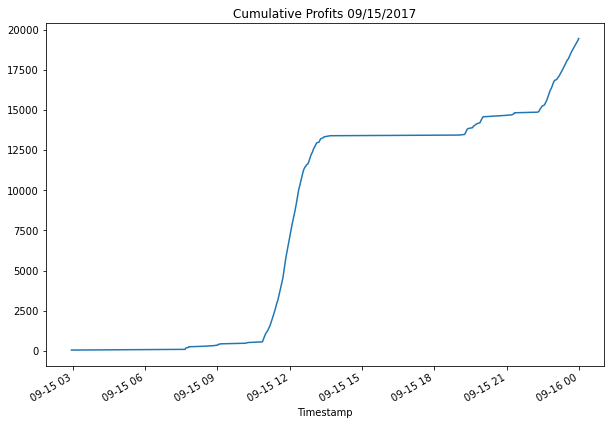

In [231]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
# YOUR CODE HERE
cumulative_profit_middle.plot(figsize=(10, 7), title="Cumulative Profits 09/15/2017")

In [232]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()


<AxesSubplot:title={'center':'Cumulative Profits 10/10/2018'}, xlabel='Timestamp'>

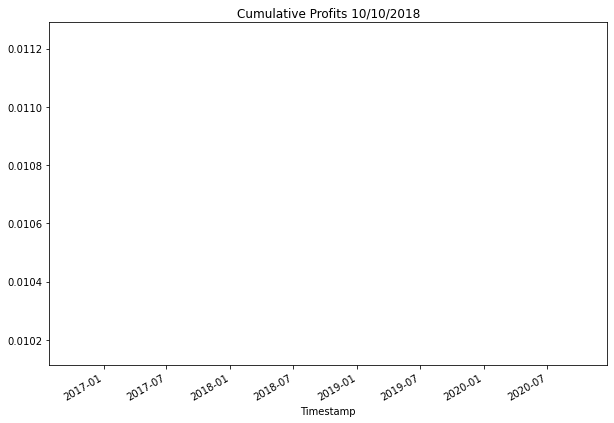

In [233]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
# YOUR CODE HERE
cumulative_profit_late.plot(figsize=(10, 7), title="Cumulative Profits 10/10/2018")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Arbitrage profits are extremely hard to come by at the market for Bitcoin matures across time. As Bitcoin grows in populatiry, the prices across the two exhanges trade more in line with one another. That makes is very difficult find a point where the price difference exceeds the minimum profit threshold of 1%.